In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/IMDb Movies India.csv",encoding='ISO-8859-1')
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
#Knowing basic information about file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [6]:
df.shape

(15509, 10)

Let start the EDA process


In [7]:
#we will se whether their is ducplicate in data
df.duplicated(subset='Name').value_counts() #for sepecific name column

False    13838
True      1671
dtype: int64

In [8]:
df.drop_duplicates(subset='Name', inplace=True)
df.duplicated(subset='Name').sum()

0

In [9]:
#see if null values present in data set
df.isnull().sum()

Name           0
Year         498
Duration    7239
Genre       1590
Rating      6685
Votes       6684
Director     465
Actor 1     1439
Actor 2     2132
Actor 3     2805
dtype: int64

here we will drop the values which will be not usefull for predicition and also we can't replace that value




In [10]:
df.dropna(subset=['Year'],inplace=True)
df.dropna(subset=['Genre'],inplace=True)
df.isnull().sum()

Name           0
Year           0
Duration    5455
Genre          0
Rating      4716
Votes       4715
Director     426
Actor 1     1001
Actor 2     1397
Actor 3     1859
dtype: int64

In [11]:
#changing datatype of durationa
df['Duration']=df['Duration'].str.replace('min','').apply(pd.to_numeric)

In [12]:
#removing paranthesis of year for visualization
df['Year']=df['Year'].str.replace('(','').str.replace(')','')

<ipython-input-12-0ef1fbcbbc75>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Year']=df['Year'].str.replace('(','').str.replace(')','')


In [13]:
#Replacing Null vlaues for Duration Rating and Votes
df['Duration'].fillna(df['Duration'].mode().max(),inplace=True)
df['Rating'].fillna(df['Rating'].mean(), inplace=True)


In [15]:
df['Votes']=df["Votes"].replace("$5.16M", 516)
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',',''))
df['Votes'].fillna(df['Votes'].mean(), inplace=True)

In [16]:
df.isnull().sum()

Name           0
Year           0
Duration       0
Genre          0
Rating         0
Votes          0
Director     426
Actor 1     1001
Actor 2     1397
Actor 3     1859
dtype: int64

In [17]:
df.shape

(11783, 10)

In [18]:
df['Director'].unique()

array(['Gaurav Bakshi', 'Soumyajit Majumdar', 'Ovais Khan', ...,
       'Mozez Singh', 'Ved Prakash', 'Kiran Thej'], dtype=object)

In [19]:

#

For better Understanding visulization


([<matplotlib.axis.YTick at 0x79c2facd6350>,
 [Text(0, 0, '0'),
  Text(0, 2, '2'),
  Text(0, 4, '4'),
  Text(0, 6, '6'),
  Text(0, 8, '8'),
  Text(0, 10, '10'),
  Text(0, 12, '12'),
  Text(0, 14, '14')])

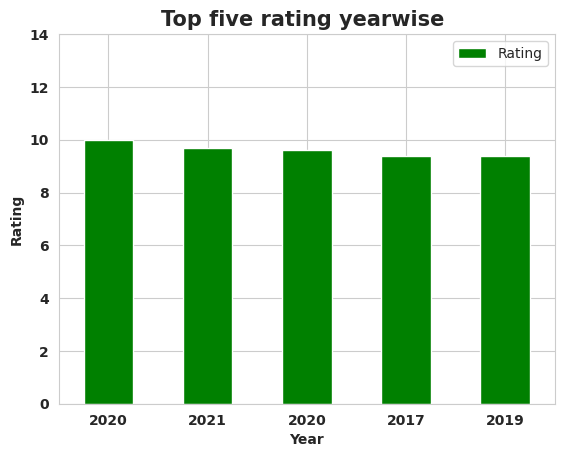

In [20]:
ratingtop=df[['Year','Rating']].sort_values(by='Rating',ascending=False)
graph1=ratingtop.head()
graph1.plot(kind='bar',x='Year',y='Rating',color='green')
plt.xlabel("Year",fontsize=10,fontweight='bold')
plt.ylabel("Rating",fontsize=10,fontweight='bold')
plt.title("Top five rating yearwise ",fontsize=15,fontweight='bold')
plt.xticks(fontweight='bold',rotation=0)
plt.yticks(np.arange(0,15,2),fontweight='bold')

([<matplotlib.axis.XTick at 0x79c2f88a4280>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10')])

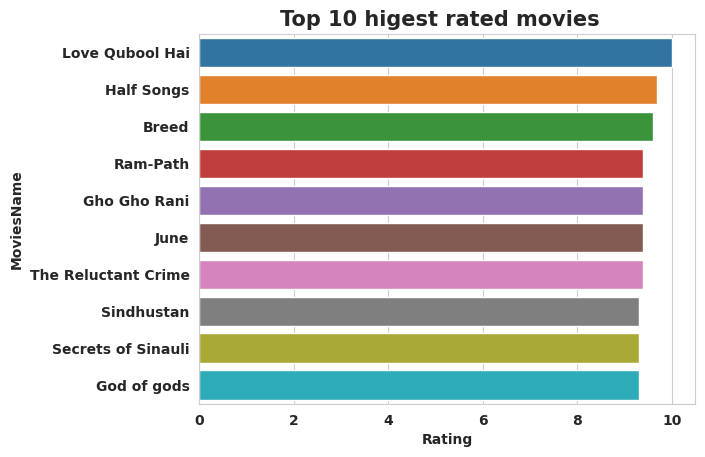

In [21]:
#top 10 best movies with higest rating
topmovies=df[['Name','Rating']].sort_values(by='Rating',ascending=False)
top10_movies=topmovies.head(10)

graph2=sns.barplot(x='Rating',y='Name',data=top10_movies)

plt.xlabel("Rating",fontsize=10,fontweight='bold')
plt.ylabel("MoviesName",fontsize=10,fontweight='bold')
plt.title("Top 10 higest rated movies  ",fontsize=15,fontweight='bold')
plt.yticks(fontweight='bold')
plt.xticks(np.arange(0,12,2),fontweight='bold')

In [22]:
df.columns




Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Action'),
  Text(2, 0, 'Thriller'),
  Text(3, 0, 'Romance'),
  Text(4, 0, 'Drama, Romance'),
  Text(5, 0, 'Comedy'),
  Text(6, 0, 'Action, Crime, Drama'),
  Text(7, 0, 'Drama, Family'),
  Text(8, 0, 'Horror'),
  Text(9, 0, 'Action, Drama'),
  Text(10, 0, 'Documentary'),
  Text(11, 0, 'Comedy, Drama'),
  Text(12, 0, 'Comedy, Drama, Romance'),
  Text(13, 0, 'Fantasy'),
  Text(14, 0, 'Comedy, Romance')])

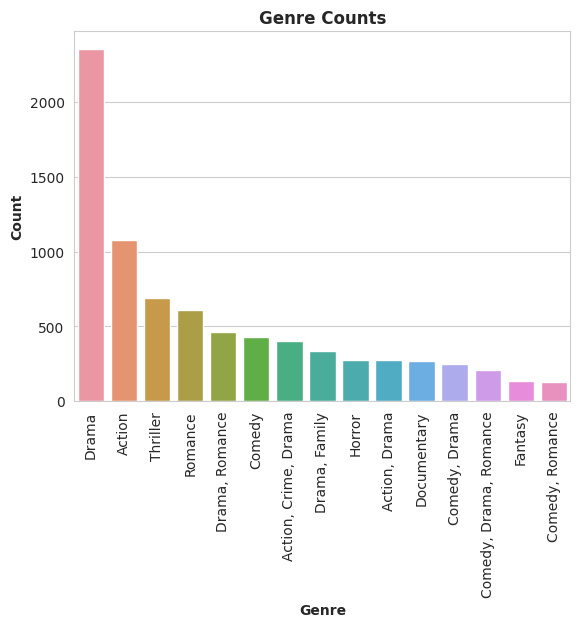

In [23]:
genre_cout=df['Genre'].value_counts()
Genre_Count=genre_cout.head(15).reset_index().rename(columns={'index':'Genre','Genre':'Count'})

sns.barplot(x='Genre',y='Count',data=Genre_Count)

plt.title('Genre Counts',fontweight='bold')
plt.xlabel('Genre',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.xticks(rotation=90)


In [24]:
def top10(column):
    global df
    df[column].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(10,6),color='#988ED5')
    plt.xlabel(column,fontsize=15,fontweight='bold')
    plt.ylabel('Count',fontweight='bold',fontsize=15)
    plt.title("Top 10 {}".format(column),fontsize=25,fontweight='bold')
    plt.xticks(rotation=0,fontsize=7,fontweight='bold')
    plt.yticks(fontsize=10,fontweight='bold')
    plt.show()

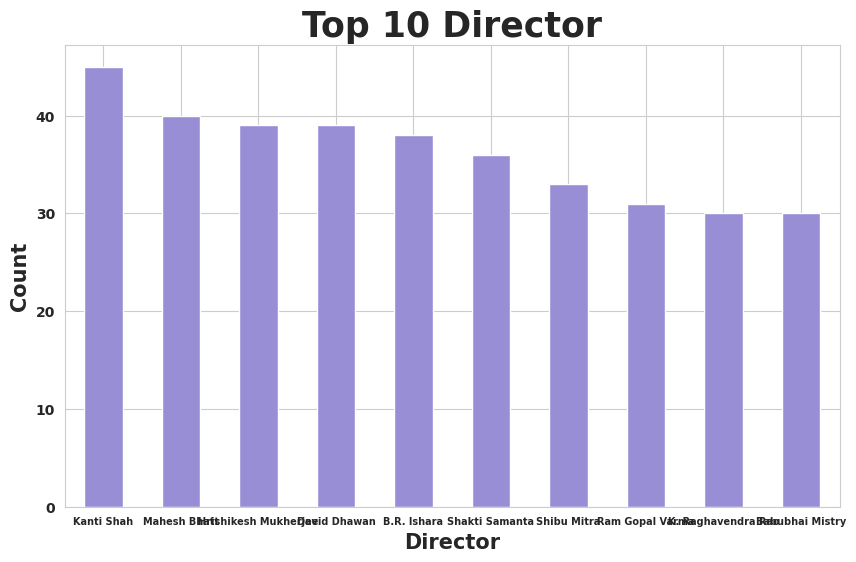

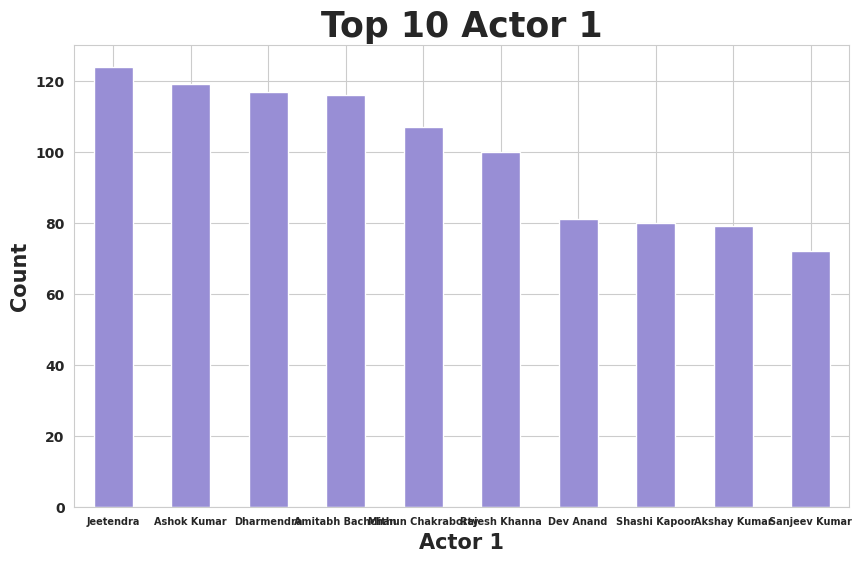

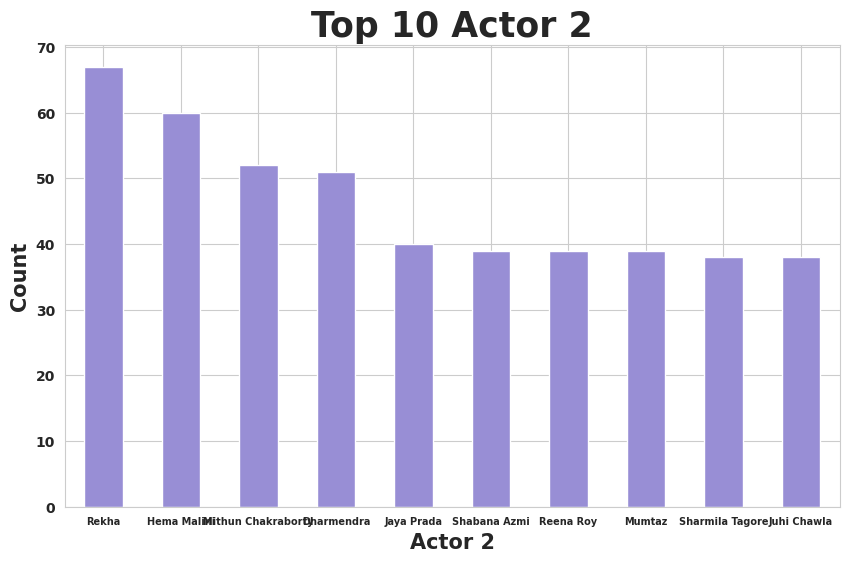

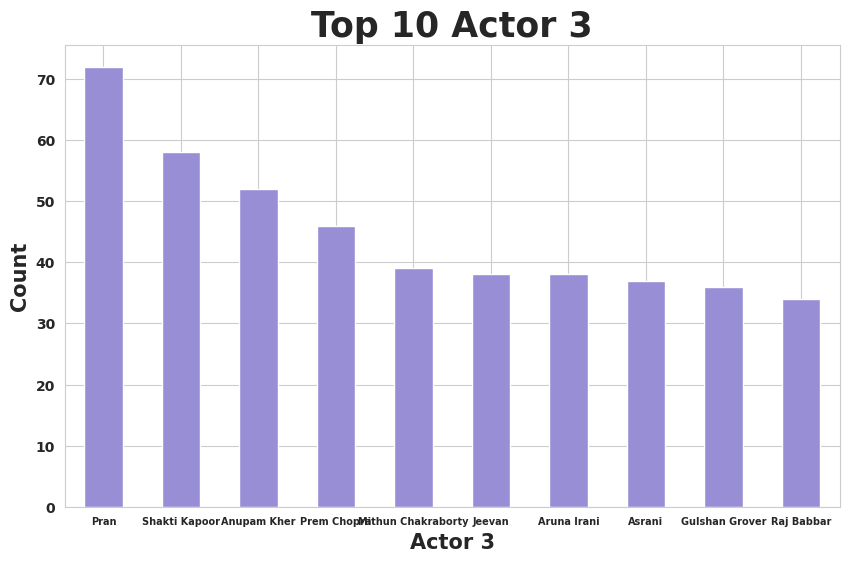

In [25]:
cols=['Director','Actor 1','Actor 2','Actor 3']
for items in cols:
    top10(items)

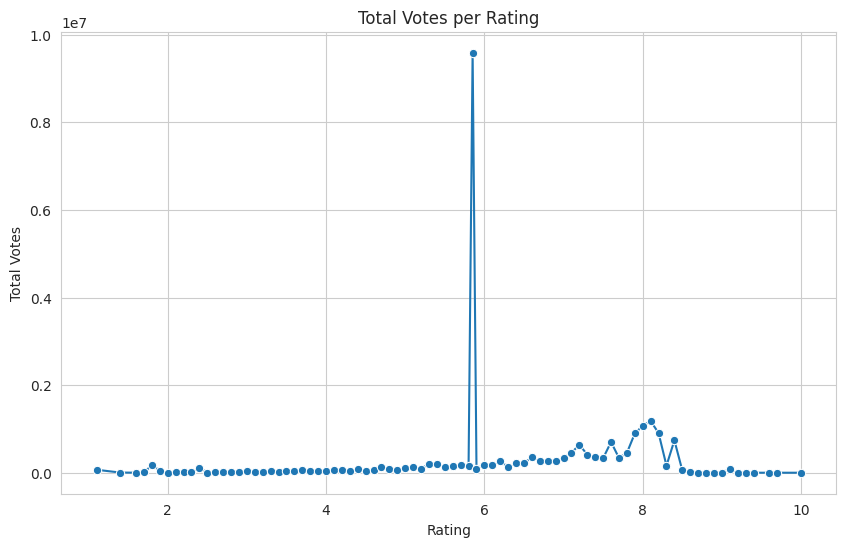

In [26]:
rating_votes=df.groupby('Rating')['Votes'].sum().reset_index()
plt.figure(figsize=(10,6))
rating_votes_graph=sns.lineplot(data=rating_votes,x='Rating',y='Votes',marker='o')
rating_votes_graph.set_xlabel('Rating')
rating_votes_graph.set_ylabel('Total Votes')
rating_votes_graph.set_title('Total Votes per Rating')
plt.show()

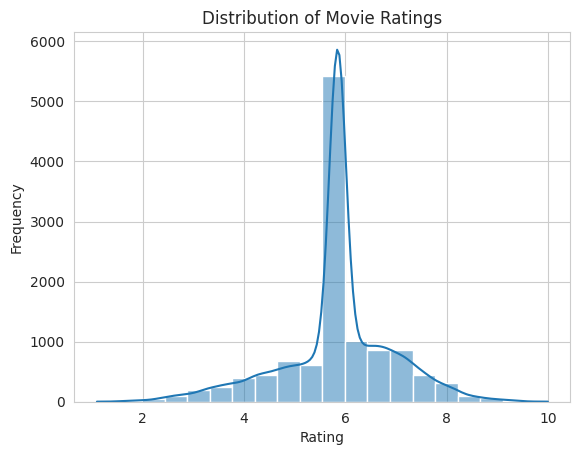

In [27]:
ax = sns.histplot(data = df, x = "Rating", bins = 20, kde = True)
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Movie Ratings')
plt.show()

In [28]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

Traning a model to predict rating


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [30]:
features=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
X=df[features]
y=df['Rating']

In [31]:
X_encode=pd.get_dummies(X,columns=features)

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X_encode,y,test_size=0.2,random_state=42)

In [33]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [34]:
model=LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [35]:
y_pred=model.predict(X_test_scaled)
